<a href="https://colab.research.google.com/github/IlD4Na/Progetto-su-valutazione-indici-EURO50-e-SP500/blob/main/Progetto_2_(Pandas%2C_Numpy%2C_Matplotlib_pyplot).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<mark> Analisi dell'Andamento degli Indici Azionari S&P 500 ed EURO STOXX 50


##Descrizione del progetto

L'azienda Global Investment Insights è una società di consulenza finanziaria che si occupa di fornire analisi dettagliate sull'andamento dei mercati azionari. Il progetto si concentra su due indici fondamentali:

- S&P 500: che rappresenta il mercato azionario statunitense.

- EURO STOXX 50: che descrive l'andamento del mercato azionario europeo.

L'obiettivo è studiare l'andamento degli ultimi 10 anni di questi indici e trarne insights preziosi che possano aiutare gli investitori a prendere decisioni strategiche.

L'analisi fornita da Global Investment Insights offrirà agli investitori una panoramica chiara e dettagliata sui trend storici di due dei principali indici azionari globali. Grazie all'approfondimento sui rendimenti giornalieri e mensili, nonché all'identificazione dei giorni di maggiore volatilità, gli investitori potranno pianificare strategie di investimento più informate e ridurre il rischio associato ai loro portafogli. Il calcolo del volume medio giornaliero, inoltre, fornirà indicazioni utili sull’interesse degli investitori e sui periodi di maggiore attività di mercato, consentendo decisioni più oculate e mirate.

##Obiettivi del progetto


L'analisi prevede i seguenti step:
- Calcolo del rendimento percentuale mensile e annuale.
- Calcolo del rendimento medio giornaliero per ciascun indice e per ciascun giorno della settimana.
- Individuazione dei giorni con il rendimento giornaliero più alto e più basso per entrambi gli indici.
- Calcolo del volume medio giornaliero di scambi per ciascun indice.

Dataset
Puoi scaricare i dataset da qui: https://drive.google.com/drive/folders/1j9tlNmoUyqlOQd8HInHoa950Gccji4mb?usp=sharing

I dataset forniti, sp500.csv per l'indice S&P 500 e euro50.csv per l'indice EURO STOXX 50, contengono le seguenti colonne:

Date: la data della rilevazione.

Open: il prezzo di apertura di quel giorno.

High: il prezzo massimo raggiunto durante il giorno.

Low: il prezzo minimo raggiunto durante il giorno.

Close: il prezzo di chiusura del giorno.

Volume: il numero di scambi avvenuti durante quel giorno.

##Steps del progetto

1. Calcolo del rendimento percentuale
Per ciascun indice, sarà calcolato il rendimento percentuale utilizzando la formula della variazione percentuale tra i prezzi di chiusura di un periodo rispetto al periodo precedente: - Rendimento mensile - Rendimento annuale

2. Rendimento medio giornaliero per giorno della settimana
Calcolare il rendimento medio giornaliero di ciascun indice per ogni giorno della settimana. Questa analisi permetterà di identificare eventuali trend particolari legati a giorni specifici (ad esempio, l'andamento delle borse il lunedì rispetto agli altri giorni della settimana).

3. Giorni con rendimento massimo e minimo
Individuare, per ciascun indice, i giorni con il rendimento giornaliero più alto e quelli con il rendimento giornaliero più basso. Questa informazione è utile per analizzare le giornate di estrema volatilità sui mercati e comprenderne le cause.

4. Calcolo del volume medio giornaliero
Analizzare il volume medio giornaliero di scambi per ciascun indice. Questo dato rappresenta il livello di attività di mercato e può aiutare a capire l'interesse degli investitori nei due indici.

Metodologia
I rendimenti percentuali verranno calcolati come variazione percentuale del prezzo di chiusura rispetto al periodo precedente (giornaliero, mensile o annuale).
Per il rendimento medio giornaliero, i dati verranno aggregati in base al giorno della settimana per ciascun indice.
Per i giorni con rendimento massimo e minimo, verranno individuati i valori estremi del rendimento giornaliero nei due dataset.

# Download dei due dataset e import delle librerie necessarie al progetto

In [ ]:
# Installazione gdown
!pip install gdown

# Modulo gdown serve per scaricare da google drive
import gdown

# URL di Google Drive (deve contenere l'ID del file) e download dei file
file_id_euro50 = '1BwYroL994llOrEu5_XmuGmLsQw_41AUO'
file_id_sp500 = '1L16kcdAQ33NJZPGvkyN6ly_PFO6eFOBD'
download_url_euro50 = f'https://drive.google.com/uc?id={file_id_euro50}'
download_url_sp500 = f'https://drive.google.com/uc?id={file_id_sp500}'


output_euro50 = 'euro50.csv'
output_sp500 = 'sp500.csv'
gdown.download(download_url_euro50, output_euro50, quiet=False)
gdown.download(download_url_sp500, output_sp500, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1BwYroL994llOrEu5_XmuGmLsQw_41AUO
To: /content/euro50.csv
100%|██████████| 255k/255k [00:00<00:00, 29.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1L16kcdAQ33NJZPGvkyN6ly_PFO6eFOBD
To: /content/sp500.csv
100%|██████████| 274k/274k [00:00<00:00, 38.7MB/s]


'sp500.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Esplorazione dei dataset

In [ ]:
df_euro50 = pd.read_csv("/content/euro50.csv")
df_euro50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2512 non-null   object 
 1   Open    2512 non-null   float64
 2   High    2512 non-null   float64
 3   Low     2512 non-null   float64
 4   Close   2512 non-null   float64
 5   Volume  2512 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 117.9+ KB


In [ ]:
df_euro50.head(3)

,Date,Open,High,Low,Close,Volume
0,2014-04-15 00:00:00+02:00,3130.149902,3139.659912,3091.189941,3091.520020,59163400
1,2014-04-16 00:00:00+02:00,3116.459961,3139.260010,3113.469971,3139.260010,63114700
2,2014-04-17 00:00:00+02:00,3140.120117,3156.639893,3121.820068,3155.810059,66521300


In [ ]:
df_sp500 = pd.read_csv("/content/sp500.csv")
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   Open    2517 non-null   float64
 2   High    2517 non-null   float64
 3   Low     2517 non-null   float64
 4   Close   2517 non-null   float64
 5   Volume  2517 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [ ]:
df_sp500.head(10)

,Date,Open,High,Low,Close,Volume
0,2014-04-15 00:00:00-04:00,153.202298,154.046360,151.689653,153.937714,157093000
1,2014-04-16 00:00:00-04:00,154.999072,155.558996,154.313784,155.550644,105197000
2,2014-04-17 00:00:00-04:00,155.341722,156.202502,155.074289,155.767929,105255000
3,2014-04-21 00:00:00-04:00,155.809663,156.361234,155.617453,156.311081,68329000
4,2014-04-22 00:00:00-04:00,156.469867,157.447646,156.386304,157.021439,85790000
5,2014-04-23 00:00:00-04:00,156.962953,157.046517,156.528381,156.653732,73869000
6,2014-04-24 00:00:00-04:00,157.422622,157.439339,156.219198,156.971344,88170000
7,2014-04-25 00:00:00-04:00,156.461512,156.553441,155.333299,155.684296,100380000
8,2014-04-28 00:00:00-04:00,156.319483,156.854337,154.572853,156.177414,135121000
9,2014-04-29 00:00:00-04:00,156.678820,157.146815,156.344541,156.904465,84098000


# Casting della colonna Date in tipo Datetime64

In [ ]:
# Trasformo la colonna Date in un tipo di dato "datetime" che mi servirà per creare le colonne mesi e anni

df_euro50["Date"] = pd.to_datetime(df_euro50["Date"], utc=True)

df_sp500["Date"] = pd.to_datetime(df_sp500["Date"], utc=True)

df_euro50.info()
print("\n")
df_sp500.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    2512 non-null   datetime64[ns, UTC]
 1   Open    2512 non-null   float64            
 2   High    2512 non-null   float64            
 3   Low     2512 non-null   float64            
 4   Close   2512 non-null   float64            
 5   Volume  2512 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 117.9 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    2517 non-null   datetime64[ns, UTC]
 1   Open    2517 non-null   float64            
 2   High    2517 non-null   float64            
 3   Low     2517 non-null   float64            
 4   Close   2517 non-nu

# Calcolo rendimento % mensile e annuale

Per calcolare il rendimento % mensile si calcola facendo:

(Valore finale dell'investimento - Valore iniziale dell'investimento) / Valore iniziale dell'investimento * 100%

Il valore iniziale corrisponde al valore di chiusura del primo giorno e valore finale corrisponde al valore di chiusura del giorno dopo un mese quindi dopo 30 giorni quindi la formula diventa:

<mark> (Close 1° giorno mese 1 - Close 1° giorno mese 0) / Close 1° giorno mese 0 * 100%

Analogamente anche il rendimento annuale corrisponde a:

<mark> (Close 1° giorno anno 1 - Close 1° giorno anno o) / Close 1° giorno anno 0 * 100%

Come prima cosa scomponiamo la data in 3 colonne che saranno rispettivamente "Day" "Month" e "Year".

In [ ]:
#Creazione delle colonne "Day" "Month" e "Year" in entrambi i dataset

df_euro50["Day"] = df_euro50["Date"].dt.day
df_euro50["Month"] = df_euro50["Date"].dt.month
df_euro50["Year"] = df_euro50["Date"].dt.year


df_sp500["Day"] = df_sp500["Date"].dt.day
df_sp500["Month"] = df_sp500["Date"].dt.month
df_sp500["Year"] = df_sp500["Date"].dt.year


In [ ]:
df_euro50.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year
0,2014-04-14 22:00:00+00:00,3130.149902,3139.659912,3091.189941,3091.520020,59163400,14,4,2014
1,2014-04-15 22:00:00+00:00,3116.459961,3139.260010,3113.469971,3139.260010,63114700,15,4,2014
2,2014-04-16 22:00:00+00:00,3140.120117,3156.639893,3121.820068,3155.810059,66521300,16,4,2014
3,2014-04-21 22:00:00+00:00,3161.689941,3201.250000,3157.399902,3199.689941,49270000,21,4,2014
4,2014-04-22 22:00:00+00:00,3197.389893,3198.600098,3175.219971,3175.969971,48916800,22,4,2014


In [ ]:
# Mi assicuro che entrambi i dataset siano in ordine cronologico in base alla data

df_euro50_cronologico = df_euro50.sort_values(by="Date")

df_sp500_cronologico = df_sp500.sort_values(by="Date")



In [ ]:
df_sp500_cronologico.head(5)

,Date,Open,High,Low,Close,Volume,Day,Month,Year
0,2014-04-15 04:00:00+00:00,153.202298,154.046360,151.689653,153.937714,157093000,15,4,2014
1,2014-04-16 04:00:00+00:00,154.999072,155.558996,154.313784,155.550644,105197000,16,4,2014
2,2014-04-17 04:00:00+00:00,155.341722,156.202502,155.074289,155.767929,105255000,17,4,2014
3,2014-04-21 04:00:00+00:00,155.809663,156.361234,155.617453,156.311081,68329000,21,4,2014
4,2014-04-22 04:00:00+00:00,156.469867,157.447646,156.386304,157.021439,85790000,22,4,2014


**Considerazione**

Il mercato non è aperto 24 ore su 24 e 7 su 7 ma è influenzato dai giorni festivi, per cui in un mese di 30 giorni non avremo i dati di tutti e 30 i giorni in quanto il sabato, la domenica ed i festivi il mercato è chiuso.

Per calcolare sia il rendimento mensile che annuale servirà usare il metodo DateOffset. Questo considererà il numero di giorni reali passati.

Con DateOffset (che sta dentro pandas) possiamo aggiungere o sottrarre una quantità specifica di tempo facendo pd.DateOffset(days='numero di giorni')

In [ ]:
def calcolo_rendimento(df, days_offset):

  """

  df: un dataframe che abbia un colonna "Date" di tipo datetime e abbia dei valori annessi alle date

  days_offset: il numero di giorni per i quali vogliamo calcolare il rendimento
  (30 = mensile / 365 = annuale / 90 = trimestrale)

  """
  output = []
  for idx, row in df.iterrows():
        date = row['Date']
        # Trova la data passata di 'days_offset' giorni

        data_meno_offsetgiorni = date - pd.DateOffset(days=days_offset)

        # Trova l'indice del giorno di mercato più vicino

        data_passata = df[df['Date'] <= data_meno_offsetgiorni].iloc[-1] if not df[df['Date'] <= data_meno_offsetgiorni].empty else None
        if data_passata is not None:
            output.append((row['Close'] / data_passata['Close'] - 1) * 100)
        else:
            output.append(None)
  return output

In [ ]:
# Calcolo rendimento mensile e annuale considerando date effettive su euro50

df_euro50_cronologico['Rendimento Mensile'] = calcolo_rendimento(df_euro50_cronologico, 30)

df_euro50_cronologico['Rendimento Annuale'] = calcolo_rendimento(df_euro50_cronologico, 365)

# Calcolo rendimento mensile e annuale considerando date effettive su sp500

df_sp500_cronologico['Rendimento Annuale'] = calcolo_rendimento(df_sp500_cronologico, 365)

df_sp500_cronologico['Rendimento Mensile'] = calcolo_rendimento(df_sp500_cronologico, 30)

In [ ]:
df_euro50_cronologico.head(250)

,Date,Open,High,Low,Close,Volume,Day,Month,Year,Rendimento Mensile,Rendimento Annuale
0,2014-04-14 22:00:00+00:00,3130.149902,3139.659912,3091.189941,3091.520020,59163400,14,4,2014,NaN,NaN
1,2014-04-15 22:00:00+00:00,3116.459961,3139.260010,3113.469971,3139.260010,63114700,15,4,2014,NaN,NaN
2,2014-04-16 22:00:00+00:00,3140.120117,3156.639893,3121.820068,3155.810059,66521300,16,4,2014,NaN,NaN
3,2014-04-21 22:00:00+00:00,3161.689941,3201.250000,3157.399902,3199.689941,49270000,21,4,2014,NaN,NaN
4,2014-04-22 22:00:00+00:00,3197.389893,3198.600098,3175.219971,3175.969971,48916800,22,4,2014,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
245,2015-04-14 22:00:00+00:00,3790.560059,3816.320068,3786.360107,3803.550049,54169700,14,4,2015,4.029859,23.031713
246,2015-04-15 22:00:00+00:00,3801.379883,3801.379883,3749.159912,3751.719971,63535100,15,4,2015,1.213191,19.509692
247,2015-04-16 22:00:00+00:00,3748.090088,3758.520020,3668.879883,3674.050049,86113100,16,4,2015,0.051472,16.421774
248,2015-04-19 22:00:00+00:00,3682.320068,3718.199951,3682.320068,3718.040039,46877300,19,4,2015,-0.215509,17.815710


Piccola prova per vedere se la formula è stata applicata correttamente al DataFrame.

In [ ]:
# index[0] corrisponde alla data di 2014-04-14 e index[245] a dopo 1 anno 2015-04-14

prova_rendimento = (df_euro50_cronologico.loc[245,"Close"] - df_euro50_cronologico.loc[0,"Close"]) / df_euro50_cronologico.loc[0,"Close"] * 100

print(f"Il rendimento a un anno è di : {prova_rendimento:.4f}% dal 2014-04-14")



Il rendimento a un anno è di : 23.0317% dal 2014-04-14


#<mark> Calcolo del rendimento medio giornaliero per ciascun indice e per ciascun giorno della settimana con individuazione dei giorni con rendimento maggiore e minore

1. Per il calcolo del rendimento medio giornaliero dobbiamo prima di tutto andare a creare una colonna (in entrambi i dataset) che contenga il valore medio dell'azione di quel giorno e ciò corrisponde alla media tra il valore massimo e valore minimo del giorno.

2. In seguito grazie a questo valore medio giornaliero e alla funzione del calcolo del rendimento possiamo creare una colonna che riassuma il rendimento day by day.

3. Grazie a questa colonna calcoliamo con il valore medio di rendimento generale su tutti i giorni tracciati che abbiamo, quindi otterremmo un valore medio giornaliero di rendimento.

In [ ]:
# Creazione della colonna "Valore medio indice"

df_euro50_cronologico["Valore medio indice"] = (df_euro50_cronologico["High"] + df_euro50_cronologico["Low"]) / 2


df_sp500_cronologico["Valore medio indice"] = (df_sp500_cronologico["High"] + df_sp500_cronologico["Low"]) / 2

In [ ]:
# Creazione della colonna "Rendimento giornaliero"

df_euro50_cronologico['Rendimento giornaliero'] = calcolo_rendimento(df_euro50_cronologico, 1)

df_sp500_cronologico['Rendimento giornaliero'] = calcolo_rendimento(df_sp500_cronologico, 1)

In [ ]:
# Calcolo valore medio di rendimento giornaliero

rendimento_giornaliero_euro50 = df_euro50_cronologico["Rendimento giornaliero"].mean()

rendimento_giornaliero_sp500 = df_sp500_cronologico["Rendimento giornaliero"].mean()


print(f"Il rendimento degli indici sono:\n\n Rendimento Giornaliero indice euro50: {rendimento_giornaliero_euro50:4f}%\n\n Rendimento Giornaliero indice sp500: {rendimento_giornaliero_sp500:4f}%")

Il rendimento degli indici sono:

 Rendimento Giornaliero indice euro50: 0.026889%

 Rendimento Giornaliero indice sp500: 0.054103%


<function matplotlib.pyplot.show(close=None, block=None)>

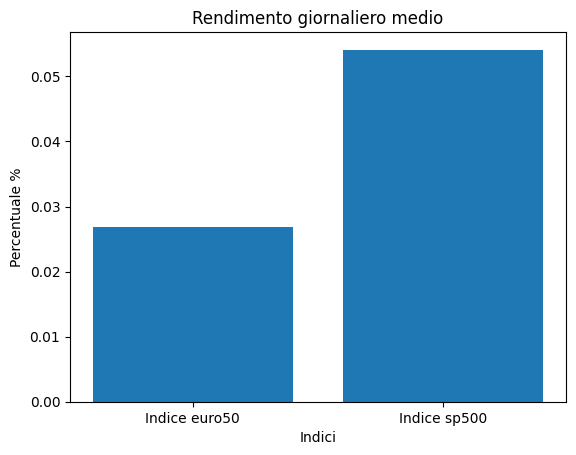

In [ ]:
# Confronto i due rendimenti giornalieri dei due indici tramite un grafico in pyplot

x =["Indice euro50","Indice sp500"]
y = [rendimento_giornaliero_euro50,rendimento_giornaliero_sp500]

plt.title("Rendimento giornaliero medio")
plt.xlabel("Indici")
plt.ylabel("Percentuale %")
plt.bar(x,y)
plt.grid
plt.show

In [ ]:
# Con che giorno della settimana parte il dataset
giorno_settimana_euro50 = df_euro50_cronologico.loc[0,"Date"].strftime("%A")
print(f"df_euro50 comincia con {giorno_settimana_euro50}\n")

giorno_settimana_sp500 = df_sp500_cronologico.loc[0,"Date"].strftime("%A")
print(f"df_sp500 comincia con {giorno_settimana_sp500}")

df_euro50 comincia con Monday

df_sp500 comincia con Tuesday


In [ ]:
# Creazione colonna con Giorno della settimana

df_euro50_cronologico["Giorno della settimana"] = df_euro50_cronologico["Date"].dt.strftime("%A")

df_sp500_cronologico["Giorno della settimana"] = df_sp500_cronologico["Date"].dt.strftime("%A")



In [ ]:
df_euro50_cronologico.head(3)


,Date,Open,High,Low,Close,Volume,Day,Month,Year,Rendimento Mensile,Rendimento Annuale,Valore medio indice,Rendimento giornaliero,Giorno della settimana
0,2014-04-14 22:00:00+00:00,3130.149902,3139.659912,3091.189941,3091.520020,59163400,14,4,2014,NaN,NaN,3115.424927,NaN,Monday
1,2014-04-15 22:00:00+00:00,3116.459961,3139.260010,3113.469971,3139.260010,63114700,15,4,2014,NaN,NaN,3126.364990,1.544224,Tuesday
2,2014-04-16 22:00:00+00:00,3140.120117,3156.639893,3121.820068,3155.810059,66521300,16,4,2014,NaN,NaN,3139.229980,0.527196,Wednesday


In [ ]:

df_sp500_cronologico.head(3)

,Date,Open,High,Low,Close,Volume,Day,Month,Year,Rendimento Annuale,Rendimento Mensile,Valore medio indice,Rendimento giornaliero,Giorno della settimana
0,2014-04-15 04:00:00+00:00,153.202298,154.046360,151.689653,153.937714,157093000,15,4,2014,NaN,NaN,152.868006,NaN,Tuesday
1,2014-04-16 04:00:00+00:00,154.999072,155.558996,154.313784,155.550644,105197000,16,4,2014,NaN,NaN,154.936390,1.047781,Wednesday
2,2014-04-17 04:00:00+00:00,155.341722,156.202502,155.074289,155.767929,105255000,17,4,2014,NaN,NaN,155.638395,0.139688,Thursday


Il primo record di entrambi i dataset non possiedono un rendimento giornaliero perchè non abbiamo il dato del giorno prima, il dato "NaN" sballa i calcoli di conseguenza vado a sostituirli con un valore 0 che considerando la moltitudine di valori presenti nel dataset andrà ad influire pochissimo sul dato medio.

In [ ]:
df_euro50_cronologico.loc[0,"Rendimento giornaliero"] = 0
df_sp500_cronologico.loc[0,"Rendimento giornaliero"] = 0

In [ ]:
df_euro50_cronologico.head(3)

,Date,Open,High,Low,Close,Volume,Day,Month,Year,Rendimento Mensile,Rendimento Annuale,Valore medio indice,Rendimento giornaliero,Giorno della settimana
0,2014-04-14 22:00:00+00:00,3130.149902,3139.659912,3091.189941,3091.520020,59163400,14,4,2014,NaN,NaN,3115.424927,0.000000,Monday
1,2014-04-15 22:00:00+00:00,3116.459961,3139.260010,3113.469971,3139.260010,63114700,15,4,2014,NaN,NaN,3126.364990,1.544224,Tuesday
2,2014-04-16 22:00:00+00:00,3140.120117,3156.639893,3121.820068,3155.810059,66521300,16,4,2014,NaN,NaN,3139.229980,0.527196,Wednesday


In [ ]:
df_sp500_cronologico.head(3)

,Date,Open,High,Low,Close,Volume,Day,Month,Year,Rendimento Annuale,Rendimento Mensile,Valore medio indice,Rendimento giornaliero,Giorno della settimana
0,2014-04-15 04:00:00+00:00,153.202298,154.046360,151.689653,153.937714,157093000,15,4,2014,NaN,NaN,152.868006,0.000000,Tuesday
1,2014-04-16 04:00:00+00:00,154.999072,155.558996,154.313784,155.550644,105197000,16,4,2014,NaN,NaN,154.936390,1.047781,Wednesday
2,2014-04-17 04:00:00+00:00,155.341722,156.202502,155.074289,155.767929,105255000,17,4,2014,NaN,NaN,155.638395,0.139688,Thursday


In [ ]:
# Funzione che mi permette di calcolare il rendimento considerando solo un
# determinato giorno specificato della settimana

def rendimento_giorno_della_settimana(df, day= "Monday"):
  """
  Questa funzione permette di fare la media dei rendimenti di un determinato
  giorno della settimana.

  Esempio: Ho un records di rendimenti giornalieri di un anno di qualche indice
  azionario e voglio sapere qual'è stata la media di rendimento dei Lunedi
  piuttosto che dei Martedi ecc...


  df : DataFrame che contenga una colonna "Date" di tipo datetime e una colonna
       "Rendimento giornaliero"

  day (str): giorno scelto tra [Monday, Tuesday, Wednesday, Thursday, Friday,
  Saturday, Sunday]

  """
  tot = []
  for index, row in df.iterrows():
    if row["Giorno della settimana"] == day:
      tot.append(row["Rendimento giornaliero"])
  return sum(tot) / len(tot)


In [ ]:
# Che giorni della settimana ho nel dataset euro50 ?

print(df_euro50_cronologico["Giorno della settimana"].value_counts())


Giorno della settimana
Tuesday      514
Monday       510
Wednesday    502
Thursday     500
Sunday       486
Name: count, dtype: int64


In [ ]:
# Che giorni della settimana ho nel dataset sp500 ?

print(df_sp500_cronologico["Giorno della settimana"].value_counts())

Giorno della settimana
Tuesday      518
Wednesday    518
Thursday     509
Friday       503
Monday       469
Name: count, dtype: int64


Il dataset dell'indice euro50 come giorni immagazinati non ha "Venerdi" e "Sabato".

Il dataset dell'indice sp500 come giorni immagazinati non ha "Sabato" e "Domenica".

In [ ]:
# Assegnazione dei vari valori

rendimento_medio_lunedi_euro50 = rendimento_giorno_della_settimana(df_euro50_cronologico, "Monday")
rendimento_medio_martedi_euro50 = rendimento_giorno_della_settimana(df_euro50_cronologico, "Tuesday")
rendimento_medio_mercoledi_euro50 = rendimento_giorno_della_settimana(df_euro50_cronologico, "Wednesday")
rendimento_medio_giovedi_euro50 = rendimento_giorno_della_settimana(df_euro50_cronologico, "Thursday")
rendimento_medio_domenica_euro50 = rendimento_giorno_della_settimana(df_euro50_cronologico, "Sunday")


rendimento_medio_lunedi_sp500 = rendimento_giorno_della_settimana(df_sp500_cronologico, "Monday")
rendimento_medio_martedi_sp500 = rendimento_giorno_della_settimana(df_sp500_cronologico, "Tuesday")
rendimento_medio_mercoledi_sp500 = rendimento_giorno_della_settimana(df_sp500_cronologico, "Wednesday")
rendimento_medio_giovedi_sp500 = rendimento_giorno_della_settimana(df_sp500_cronologico, "Thursday")
rendimento_medio_venerdi_sp500 = rendimento_giorno_della_settimana(df_sp500_cronologico, "Friday")




<function matplotlib.pyplot.show(close=None, block=None)>

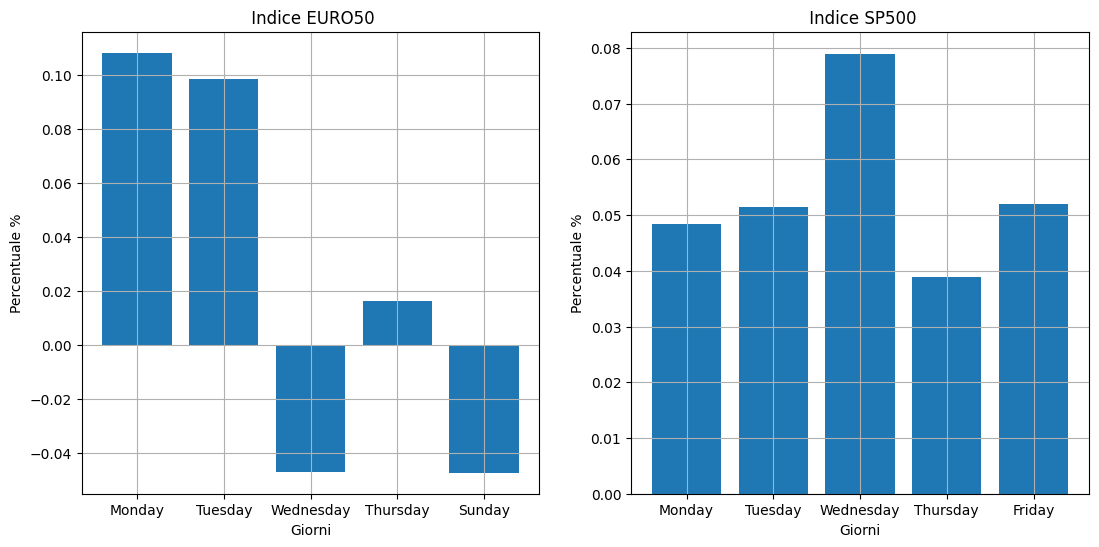

In [ ]:
# Grandezza dei grafici

plt.figure(figsize=(13, 6))

# 1° Grafico

x_euro50 =["Monday","Tuesday","Wednesday","Thursday","Sunday"]
y_euro50 = [rendimento_medio_lunedi_euro50,rendimento_medio_martedi_euro50,rendimento_medio_mercoledi_euro50,rendimento_medio_giovedi_euro50,rendimento_medio_domenica_euro50]

plt.subplot(1,2,1)

plt.title(" Indice EURO50")
plt.xlabel("Giorni")
plt.ylabel("Percentuale %")
plt.bar(x_euro50,y_euro50)
plt.grid()


# 2° Grafico

x_sp500 = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
y_sp500 = [rendimento_medio_lunedi_sp500,rendimento_medio_martedi_sp500,rendimento_medio_mercoledi_sp500,rendimento_medio_giovedi_sp500,rendimento_medio_venerdi_sp500]

plt.subplot(1,2,2)

plt.title(" Indice SP500")
plt.xlabel("Giorni")
plt.ylabel("Percentuale %")
plt.bar(x_sp500,y_sp500)
plt.grid()

plt.show

#<mark> Calcolo volume medio giornaliero per entrambi gli indici


<function matplotlib.pyplot.show(close=None, block=None)>

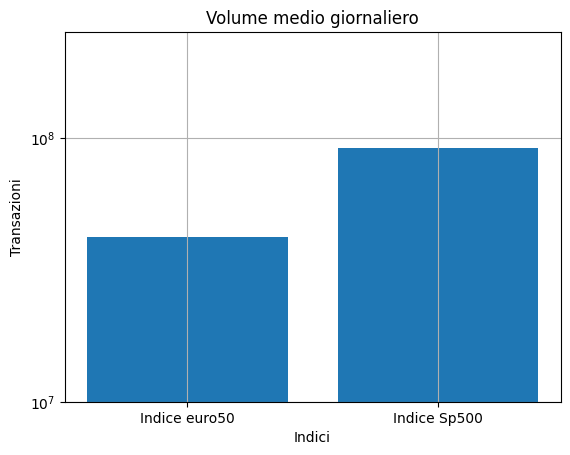

In [ ]:
volume_medio_giornaliero_euro50 = df_euro50_cronologico["Volume"].mean()

volume_medio_giornaliero_sp500 = df_sp500_cronologico["Volume"].mean()

x = ["Indice euro50", "Indice Sp500"]
y = [volume_medio_giornaliero_euro50,volume_medio_giornaliero_sp500]

plt.bar(x,y)
plt.title("Volume medio giornaliero")
plt.xlabel("Indici")
plt.ylabel("Transazioni")
plt.grid()
plt.yscale('symlog')
plt.ylim(10000000)
plt.show

In [ ]:
print(f"Le transazioni medie giornaliere degli indici sono:\n\nEuro50:{volume_medio_giornaliero_euro50:.2e}\n\nSp500:{volume_medio_giornaliero_sp500:.2e}")

Le transazioni medie giornaliere degli indici sono:

Euro50:4.19e+07

Sp500:9.13e+07


#Riassunto Finale



<function matplotlib.pyplot.show(close=None, block=None)>

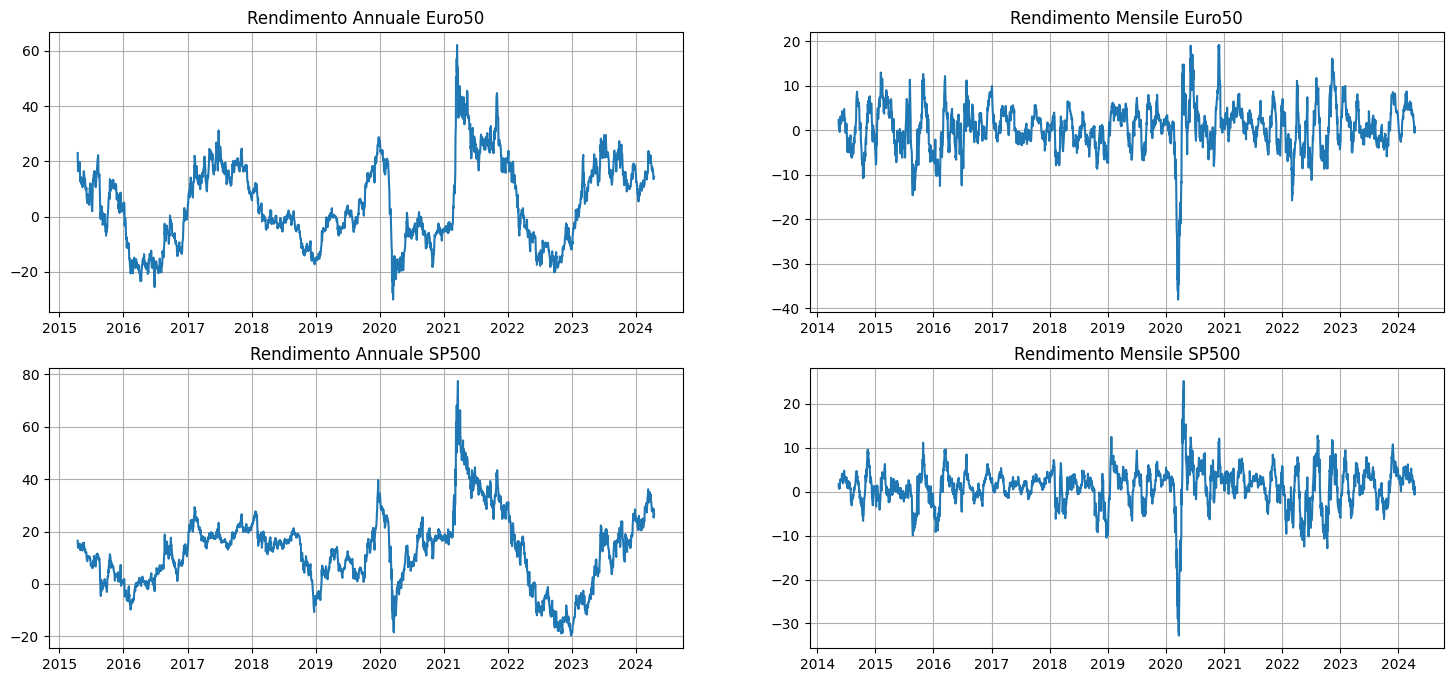

In [ ]:
plt.figure(figsize=(18, 8))

# Grafico rendimento Annuale Euro50
plt.subplot(2, 2, 1)
plt.plot(df_euro50_cronologico["Date"],df_euro50_cronologico["Rendimento Annuale"])
plt.title("Rendimento Annuale Euro50")
plt.grid()
plt.show

# Grafico rendimento Mensile Euro50
plt.subplot(2, 2, 2)
plt.plot(df_euro50_cronologico["Date"],df_euro50_cronologico["Rendimento Mensile"])
plt.title("Rendimento Mensile Euro50")
plt.grid()
plt.show

# Grafico rendimento Annuale SP500
plt.subplot(2, 2, 3)
plt.plot(df_sp500_cronologico["Date"],df_sp500_cronologico["Rendimento Annuale"])
plt.title("Rendimento Annuale SP500")
plt.grid()
plt.show

# Grafico rendimento Mensile SP500
plt.subplot(2, 2, 4)
plt.plot(df_sp500_cronologico["Date"],df_sp500_cronologico["Rendimento Mensile"])
plt.title("Rendimento Mensile SP500")
plt.grid()
plt.show

Dai 4 grafici possiamo notare come l'SP500 a differenza del Euro50 ha toccato dei massimi maggiori, nonostante le oscillazioni si assomiglino.

<function matplotlib.pyplot.show(close=None, block=None)>

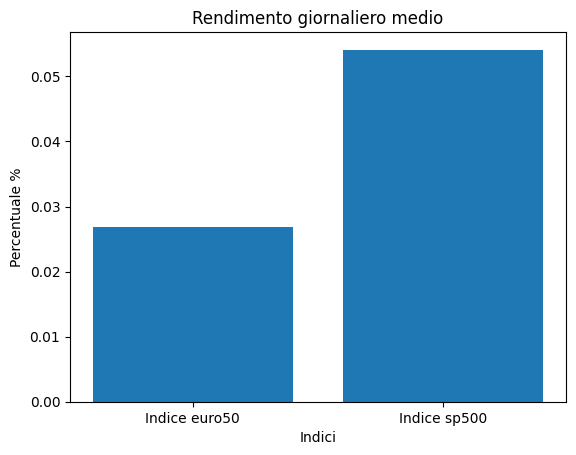

In [ ]:
# Confronto i due rendimenti giornalieri dei due indici tramite un grafico in pyplot

x =["Indice euro50","Indice sp500"]
y = [rendimento_giornaliero_euro50,rendimento_giornaliero_sp500]

plt.title("Rendimento giornaliero medio")
plt.xlabel("Indici")
plt.ylabel("Percentuale %")
plt.bar(x,y)
plt.grid
plt.show

In seguito vediamo che l'indice SP500 ha un generale maggiore rendimento giornaliero rispetto all'indice euro50.

<function matplotlib.pyplot.show(close=None, block=None)>

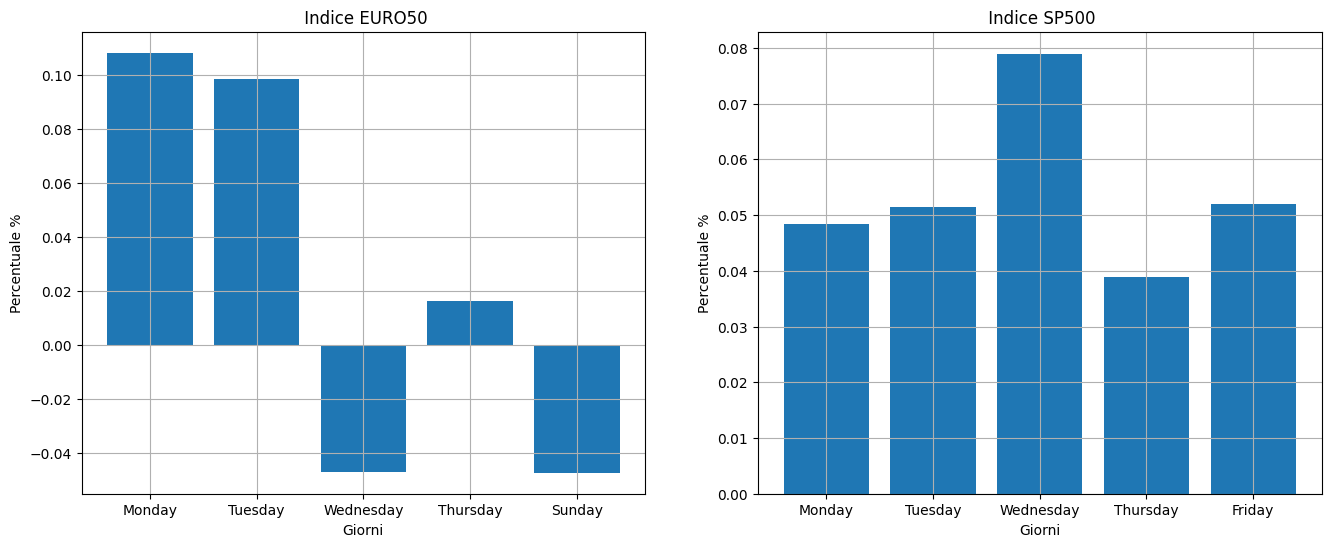

In [ ]:
# Grandezza dei grafici

plt.figure(figsize=(16, 6))

# 1° Grafico

x_euro50 =["Monday","Tuesday","Wednesday","Thursday","Sunday"]
y_euro50 = [rendimento_medio_lunedi_euro50,rendimento_medio_martedi_euro50,rendimento_medio_mercoledi_euro50,rendimento_medio_giovedi_euro50,rendimento_medio_domenica_euro50]

plt.subplot(1,2,1)

plt.title(" Indice EURO50")
plt.xlabel("Giorni")
plt.ylabel("Percentuale %")
plt.bar(x_euro50,y_euro50)
plt.grid()


# 2° Grafico

x_sp500 = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
y_sp500 = [rendimento_medio_lunedi_sp500,rendimento_medio_martedi_sp500,rendimento_medio_mercoledi_sp500,rendimento_medio_giovedi_sp500,rendimento_medio_venerdi_sp500]

plt.subplot(1,2,2)

plt.title(" Indice SP500")
plt.xlabel("Giorni")
plt.ylabel("Percentuale %")
plt.bar(x_sp500,y_sp500)
plt.grid()

plt.show

Di seguito notiamo come nell'indice SP500 di norma nessun giorno della settimana ha rendimento medio negativo a differenza dell'indice Euro50 che presenta due rendimenti giornalieri medi sotto lo 0: rispettivamente il Mercoledi e la domenica.

<function matplotlib.pyplot.show(close=None, block=None)>

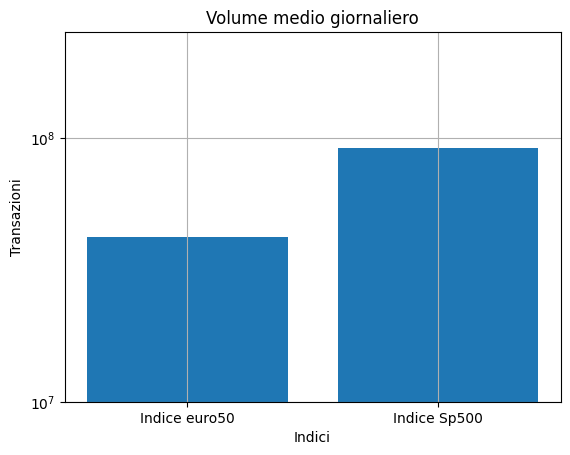

In [ ]:
volume_medio_giornaliero_euro50 = df_euro50_cronologico["Volume"].mean()

volume_medio_giornaliero_sp500 = df_sp500_cronologico["Volume"].mean()

x = ["Indice euro50", "Indice Sp500"]
y = [volume_medio_giornaliero_euro50,volume_medio_giornaliero_sp500]

plt.bar(x,y)
plt.title("Volume medio giornaliero")
plt.xlabel("Indici")
plt.ylabel("Transazioni")
plt.grid()
plt.yscale('symlog')
plt.ylim(10000000)
plt.show

A livello di volume medio di transizioni giornaliere notiamo come sia maggiore quello dell'indice Sp500 rispetto a quello dell'indice Euro50.